In [1]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 39 kB/s 
     |████████████████████████████████| 198 kB 46.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=428c3ed5be494b30e2b8ec338f7de781a12f03f0c22064ba20be359faad60cf4
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [2]:
import pyspark 
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("pysparkdf").getOrCreate()
df = spark.read.option("header", "true").csv("/content/sample_data/Modified_Dataset.csv")
df.show(10)

+----------+------+-------------+----------+------+------------+----------------+------------+----------------+-----------+---------------+--------------+----------------+--------------------+------------+-----+
|customerID|gender|SeniorCitizen|Dependents|tenure|PhoneService|   MultipleLines|OnlineBackup|DeviceProtection|TechSupport|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|TotalCharges|Churn|
+----------+------+-------------+----------+------+------------+----------------+------------+----------------+-----------+---------------+--------------+----------------+--------------------+------------+-----+
|7590-VHVEG|Female|            0|        No|     1|          No|No phone service|         Yes|              No|         No|             No|Month-to-month|             Yes|    Electronic check|       29.85|   No|
|5575-GNVDE|  Male|            0|        No|    34|         Yes|              No|          No|             Yes|         No|             No|      One yea

In [3]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: string (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [5]:
df.count()

7043

In [6]:
df.select('SeniorCitizen','tenure','TotalCharges').describe().show()

+-------+------------------+------------------+------------------+
|summary|     SeniorCitizen|            tenure|      TotalCharges|
+-------+------------------+------------------+------------------+
|  count|              7043|              7043|              7043|
|   mean|0.1621468124378816| 32.37114865824223|2283.3004408418697|
| stddev|0.3686116056100135|24.559481023094442| 2266.771361883145|
|    min|                 0|                 0|                  |
|    max|                 1|                 9|             999.9|
+-------+------------------+------------------+------------------+



In [7]:
df.filter(df['SeniorCitizen'].isNull()).count()
df.filter(df['tenure'].isNull()).count()
df.filter(df['TotalCharges'].isNull()).count()

0

In [9]:
for col in df.columns:
 print(col, "\t", "with null values: ", df.filter(df[col].isNull()).count())

customerID 	 with null values:  0
gender 	 with null values:  0
SeniorCitizen 	 with null values:  0
Dependents 	 with null values:  0
tenure 	 with null values:  0
PhoneService 	 with null values:  0
MultipleLines 	 with null values:  0
OnlineBackup 	 with null values:  0
DeviceProtection 	 with null values:  0
TechSupport 	 with null values:  0
StreamingMovies 	 with null values:  0
Contract 	 with null values:  0
PaperlessBilling 	 with null values:  0
PaymentMethod 	 with null values:  0
TotalCharges 	 with null values:  0
Churn 	 with null values:  0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
%matplotlib inline
sns.set_style("darkgrid")

# Overall color
single_color = "#2a9d8f"
dual_color = ['#e76f51','#2a9d8f']
triple_color = ['#e76f51','#2a9d8f','#264653']

In [11]:
df = pd.read_csv('/content/sample_data/Modified_Dataset.csv')

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,0,No,1,No,No phone service,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,34,Yes,No,No,Yes,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,0,No,2,Yes,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,0,No,45,No,No phone service,No,Yes,Yes,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,0,No,2,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Dependents        7043 non-null   object
 4   tenure            7043 non-null   int64 
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingMovies   7043 non-null   object
 11  Contract          7043 non-null   object
 12  PaperlessBilling  7043 non-null   object
 13  PaymentMethod     7043 non-null   object
 14  TotalCharges      7043 non-null   object
 15  Churn             7043 non-null   object
dtypes: int64(2), object(14)
memory usage: 880.5+ KB


In [14]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
TotalCharges        11
Churn                0
dtype: int64

In [104]:
df.dropna(inplace=True)

In [16]:
df_x = df.iloc[:,1:]

In [17]:
df_x['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_x['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [18]:
df_dummies = pd.get_dummies(df_x)
df_dummies.head()

,SeniorCitizen,tenure,TotalCharges,Churn,gender_Female,gender_Male,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,1889.50,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,108.15,1,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,1840.75,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,151.65,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


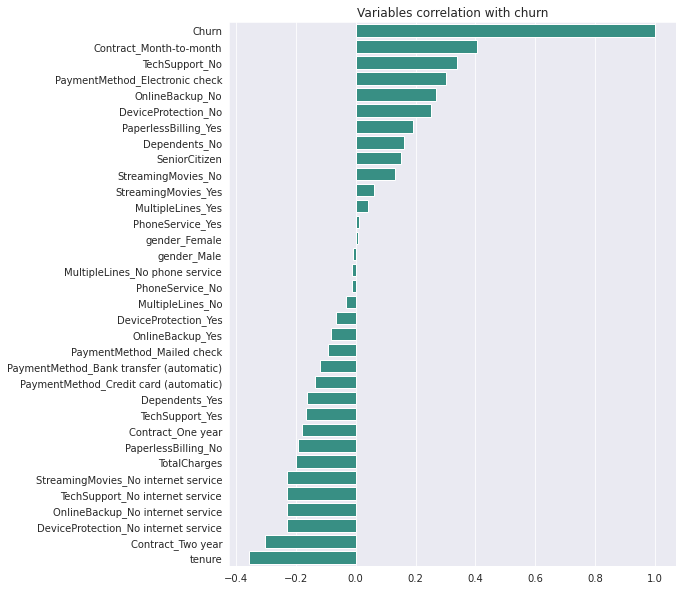

In [21]:
fig = plt.figure(figsize=(8,10))
corr_plot = df_dummies.corr()['Churn']

head = corr_plot.sort_values(ascending=False)

sns.barplot(head.values, head.index,color=single_color)
plt.title("Variables correlation with churn")
plt.show()

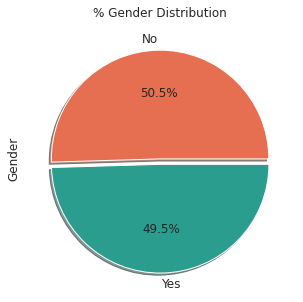

In [22]:
fig = plt.figure(facecolor='white')
explode=[0,0.05]
ax = (df['gender'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12,colors=dual_color,shadow=True,explode=explode)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Gender',fontsize = 12)
ax.set_title('% Gender Distribution', fontsize = 12)

plt.show()

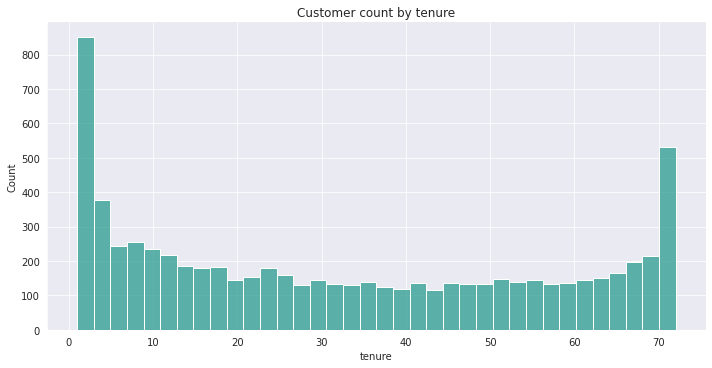

In [23]:
sns.displot(data=df, x="tenure",bins=int(180/5),height=5,aspect=2, color=single_color)
plt.title('Customer count by tenure')
plt.show()

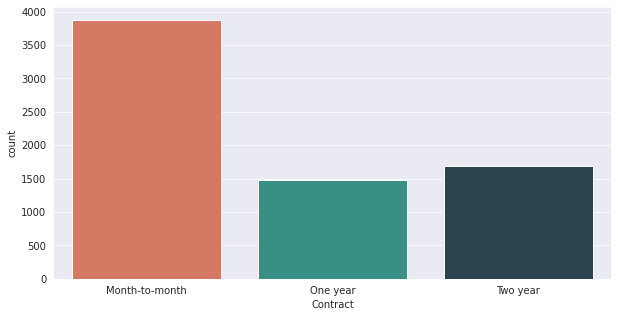

In [24]:
fig = plt.figure(figsize=(10,5),facecolor='white')
sns.countplot(x="Contract", data=df,palette=triple_color)
plt.show()

In [107]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [108]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [109]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [110]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

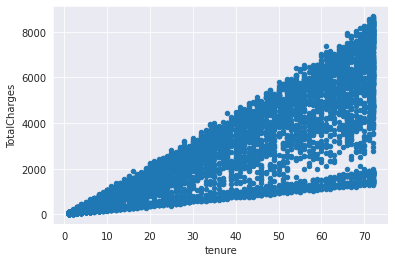

In [25]:
df.plot(kind='scatter', x='tenure', y='TotalCharges')

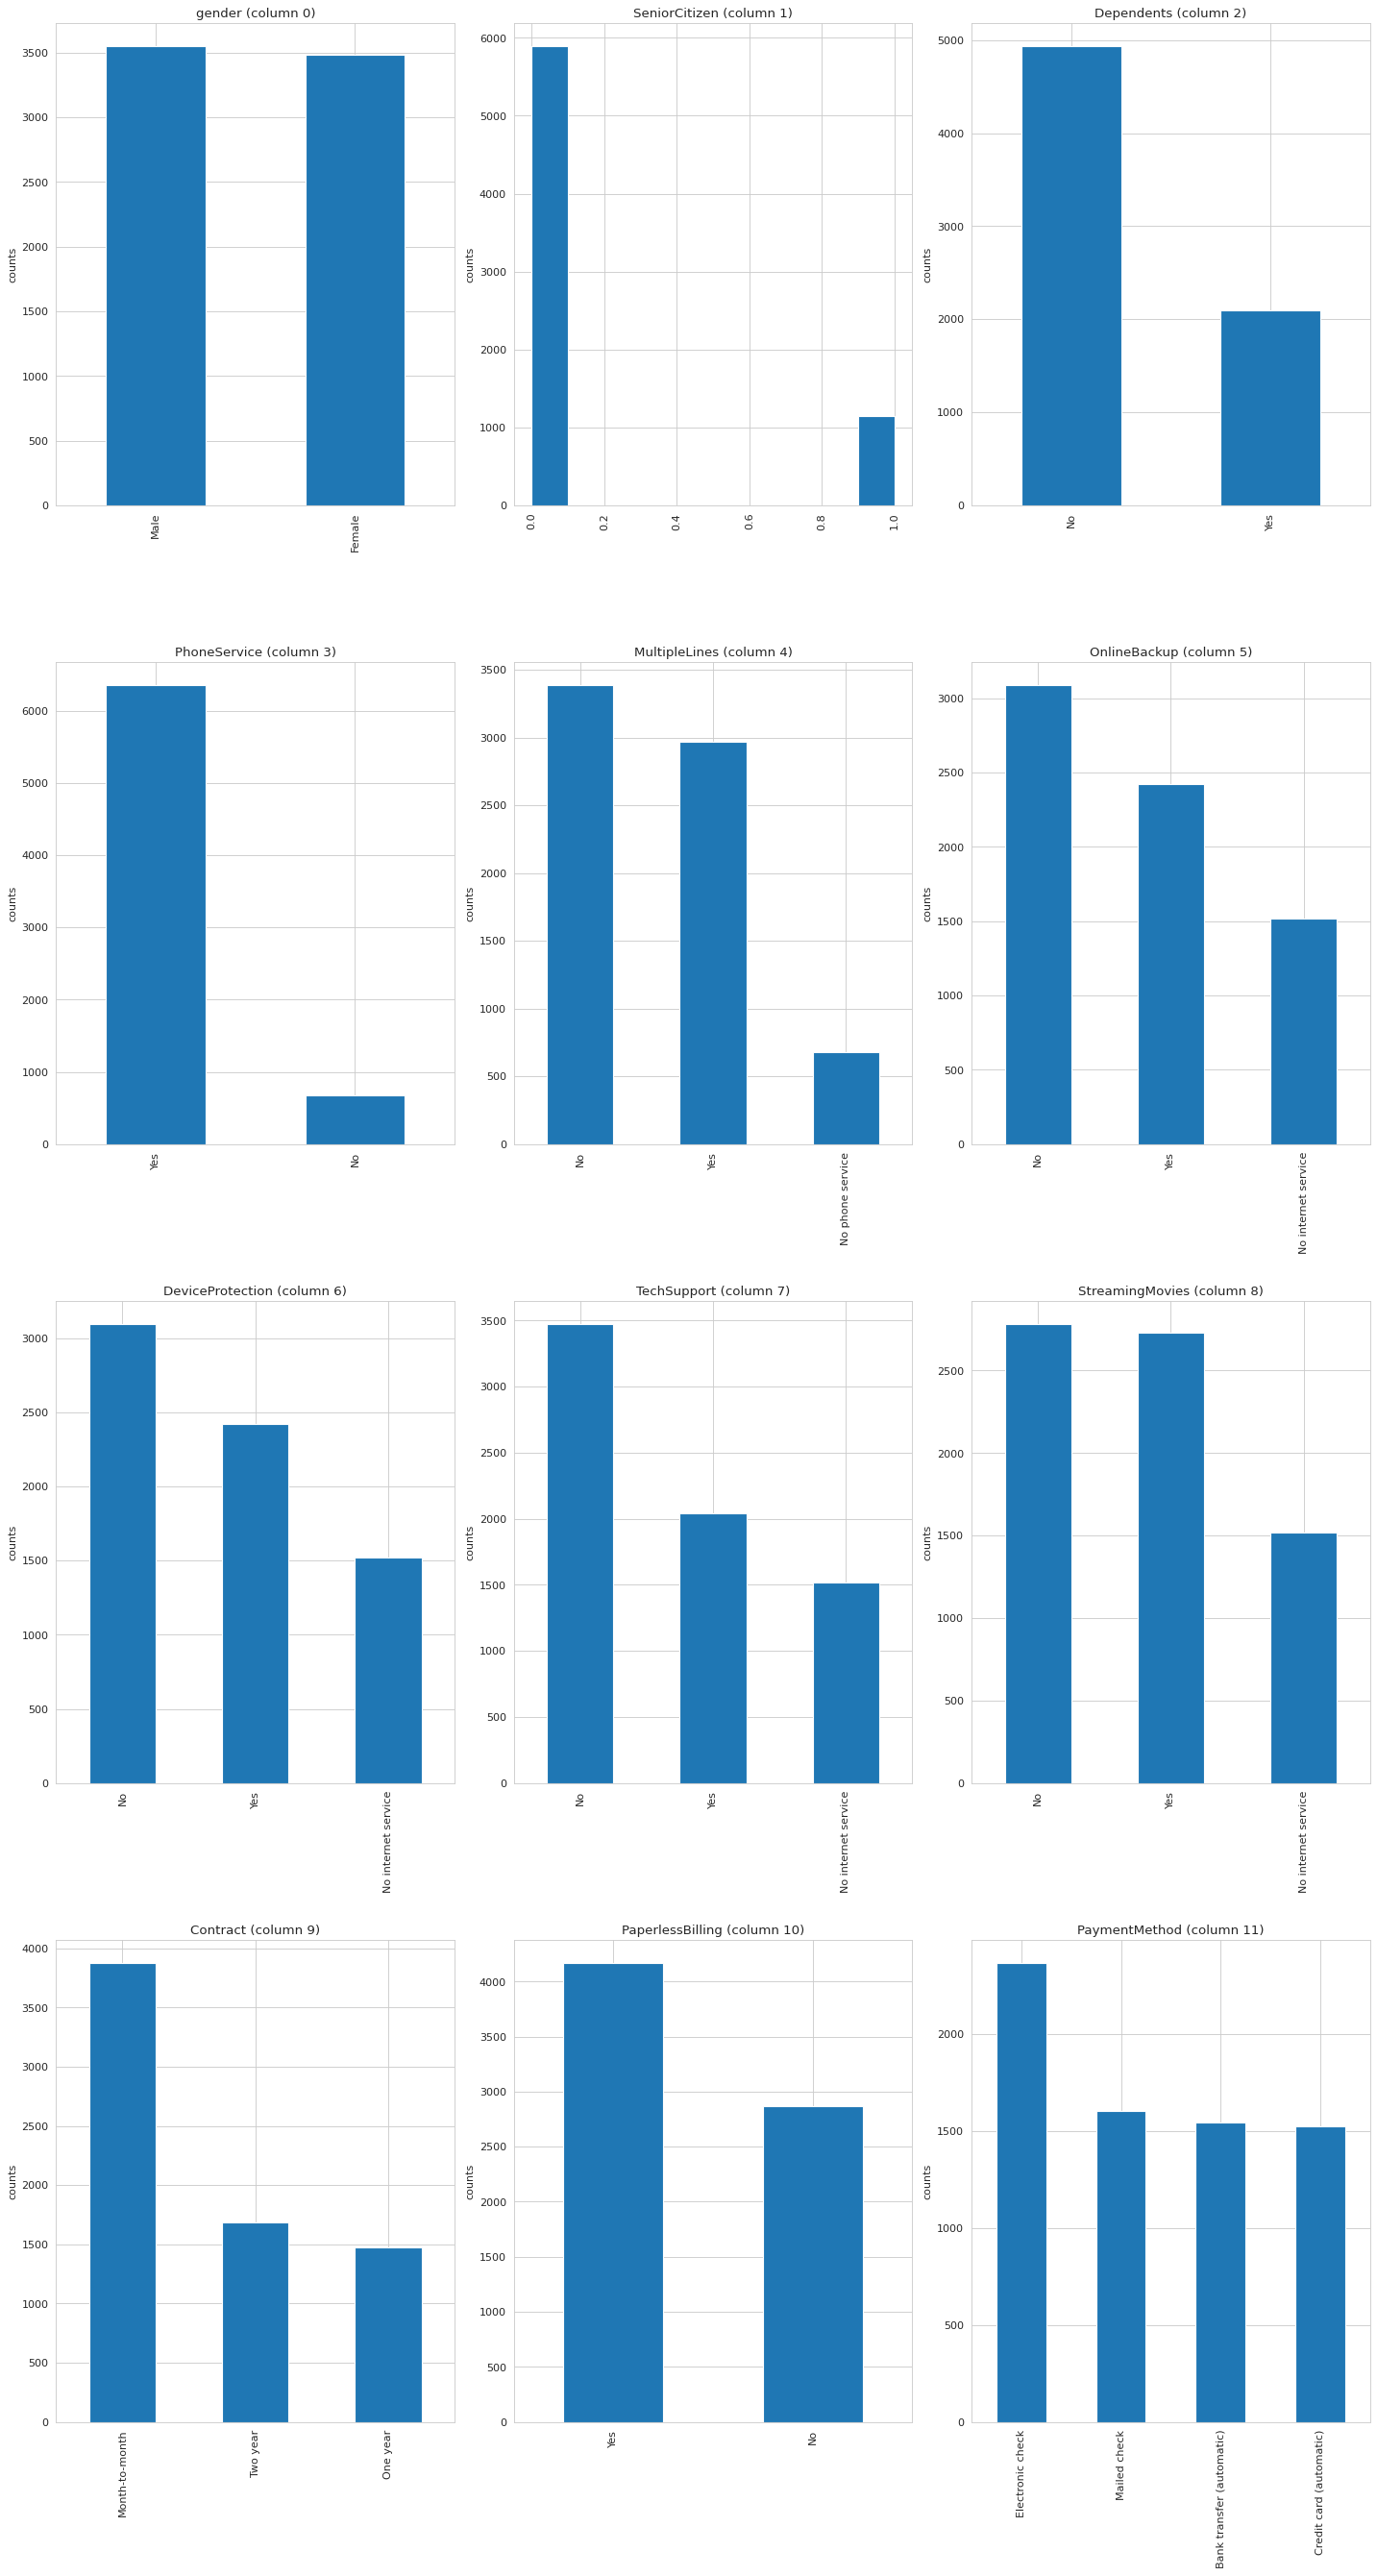

In [136]:
plotPerColumnDistribution(df, 12,3)

In [118]:
df.corr()
 

,SeniorCitizen,tenure,TotalCharges
SeniorCitizen,1.000000,0.015683,0.102411
tenure,0.015683,1.000000,0.825880
TotalCharges,0.102411,0.825880,1.000000


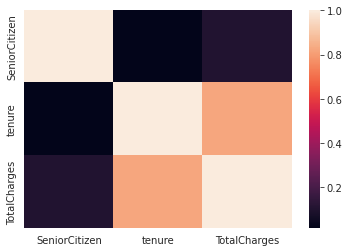

In [119]:
sns.heatmap(df.corr())

In [121]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [122]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   Dependents_No                            7032 non-null   uint8  
 7   Dependents_Yes                           7032 non-null   uint8  
 8   PhoneService_No                          7032 non-null   uint8  
 9   PhoneService_Yes                         7032 non-null   uint8  
 10  MultipleLines_No                         7032 no

In [123]:
y = df_dummies.Churn
X = df_dummies.drop('Churn', axis=1)
sf = SelectKBest(chi2, k='all')
sf_fit1 = sf.fit(X, y)
# print feature scores
for i in range(len(sf_fit1.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit1.scores_[i]))

 SeniorCitizen: 133.482766
 tenure: 16377.328093
 TotalCharges: 629630.810349
 gender_Female: 0.259116
 gender_Male: 0.254297
 Dependents_No: 55.856253
 Dependents_Yes: 131.271509
 PhoneService_No: 0.868247
 PhoneService_Yes: 0.092948
 MultipleLines_No: 3.888642
 MultipleLines_No phone service: 0.868247
 MultipleLines_Yes: 6.514651
 OnlineBackup_No: 282.490201
 OnlineBackup_No internet service: 285.475152
 OnlineBackup_Yes: 31.209832
 DeviceProtection_No: 250.189168
 DeviceProtection_No internet service: 285.475152
 DeviceProtection_Yes: 20.216007
 TechSupport_No: 404.010811
 TechSupport_No internet service: 285.475152
 TechSupport_Yes: 135.439602
 StreamingMovies_No: 72.862668
 StreamingMovies_No internet service: 285.475152
 StreamingMovies_Yes: 15.930611
 Contract_Month-to-month: 516.714004
 Contract_One year: 176.608724
 Contract_Two year: 486.223101
 PaperlessBilling_No: 152.777027
 PaperlessBilling_Yes: 104.979224
 PaymentMethod_Bank transfer (automatic): 76.619066
 PaymentMethod

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


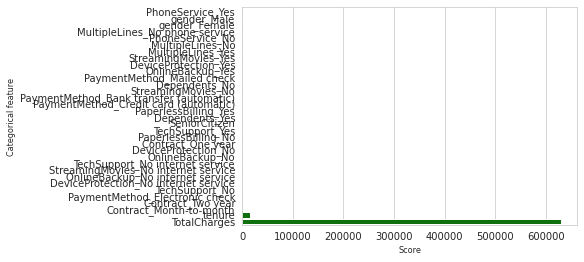

In [124]:
# plot the scores of features
datset1 = pd.DataFrame()
datset1['feature'] = X.columns[ range(len(sf_fit1.scores_))]
datset1['scores'] = sf_fit1.scores_
datset1 = datset1.sort_values(by='scores', ascending=True)
sns.barplot(datset1['scores'], datset1['feature'], color='green')
sns.set_style('whitegrid')
plt.ylabel('Categorical feature', fontsize=8)
plt.xlabel('Score', fontsize=8)
plt.show()

In [125]:
features = ["tenure", "TotalCharges", "Contract_Month-to-month", "Contract_One year", "Contract_Two year", "TechSupport_No", "TechSupport_Yes", "TechSupport_No internet service", "PaymentMethod_Electronic check", "OnlineBackup_No", "OnlineBackup_No internet service", "DeviceProtection_No", "DeviceProtection_No internet service", "SeniorCitizen", "StreamingMovies_No internet service", "PaperlessBilling_No", "Dependents_Yes"]

In [126]:
features = ["tenure", "TotalCharges", "Contract_Month-to-month", "TechSupport_No", "PaymentMethod_Electronic check", "OnlineBackup_No", "OnlineBackup_No internet service", "DeviceProtection_No", "SeniorCitizen", "PaperlessBilling_No", "Dependents_Yes"]

In [127]:
features = ["tenure", "TotalCharges", "SeniorCitizen", "PaperlessBilling_No", "Dependents_Yes"]

In [128]:
y = df_dummies.Churn
x = df_dummies[features]

In [49]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [50]:
X_train.value_counts()

tenure  TotalCharges  SeniorCitizen  PaperlessBilling_No  Dependents_Yes
1       19.55         0              1                    0                 5
        20.20         0              1                    0                 4
        20.05         0              1                    0                 4
        19.75         0              1                    0                 4
        20.15         0              1                    0                 3
                                                                           ..
48      1057.00       0              1                    1                 1
        1133.70       0              1                    0                 1
        1171.50       0              1                    0                 1
        1173.35       0              1                    1                 1
1       18.80         0              1                    1                 1
Length: 5533, dtype: int64

In [51]:
X_test.value_counts()

tenure  TotalCharges  SeniorCitizen  PaperlessBilling_No  Dependents_Yes
1       19.65         0              1                    0                 3
        80.55         0              0                    0                 2
        69.35         0              0                    0                 2
        19.30         0              1                    0                 2
        69.60         0              0                    0                 2
                                                                           ..
47      1041.80       0              0                    1                 1
        1046.20       0              1                    0                 1
        1250.85       0              1                    0                 1
        1875.25       0              1                    0                 1
1       19.20         0              1                    0                 1
Length: 1398, dtype: int64

In [52]:
y_train.value_counts()

0    4167
1    1458
Name: Churn, dtype: int64

In [53]:
y_test.value_counts()

0    996
1    411
Name: Churn, dtype: int64

In [64]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [65]:
model_dt_2 = DecisionTreeClassifier(random_state = 1, max_depth = 2)
model_dt_2.fit(X_train, y_train)
model_dt_2_score_train = model_dt_2.score(X_train, y_train)
print("Training Score : ", model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(X_test, y_test)
print("Testing Score : ", model_dt_2_score_test)

Training Score :  0.7598222222222222
Testing Score :  0.7540867093105899


In [66]:
model_dt_4 = DecisionTreeClassifier(random_state = 1, max_depth = 4)
model_dt_4.fit(X_train, y_train)
model_dt_4_score_train = model_dt_4.score(X_train, y_train)
print("Training Score : ", model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(X_test, y_test)
print("Testing Score : ", model_dt_4_score_test)

Training Score :  0.7749333333333334
Testing Score :  0.7640369580668088


In [67]:
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "entropy")
model_dt_8.fit(X_train, y_train)
model_dt_8_score_train = model_dt_8.score(X_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(X_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8144
Testing score:  0.7661691542288557


In [97]:
from __future__ import print_function

import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [98]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [100]:
visualize_tree(model_dt_8, features)

In [88]:
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

In [102]:
get_code(model_dt_4, features, "Churn")

if ( tenure <= 17.5 ) {
    if ( PaperlessBilling_No <= 0.5 ) {
        if ( tenure <= 5.5 ) {
            if ( SeniorCitizen <= 0.5 ) {
                return C ( 205 examples )
                return h ( 308 examples )
            }
            else {
                return C ( 23 examples )
                return h ( 97 examples )
            }
        }
        else {
            if ( TotalCharges <= 523.0500183105469 ) {
                return C ( 123 examples )
                return h ( 38 examples )
            }
            else {
                return C ( 202 examples )
                return h ( 217 examples )
            }
        }
    }
    else {
        if ( tenure <= 5.5 ) {
            if ( TotalCharges <= 24.5 ) {
                return C ( 69 examples )
                return h ( 21 examples )
            }
            else {
                return C ( 197 examples )
                return h ( 151 examples )
            }
        }
        else {
            if ( T

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.389777 to fit



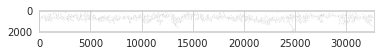

In [103]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('/content/sample_data/Modified_Dataset.csv')

img=pltimg.imread('/content/sample_data/Modified_Dataset.csv')
imgplot = plt.imshow(img)
plt.show()